(ordinal_regression)=
# Regression Models with Ordered Categorical Outcomes

:::{post} April, 2023
:tags: ordinal regression, generalized linear model, 
:category: beginner, reference
:author: Nathaniel Forde
:::

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import numpy as np
import pytensor.tensor as pt

In [2]:
%config InlineBackend.figure_format = 'retina'  # high resolution figures
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(42)

## Ordered Categories: Examples

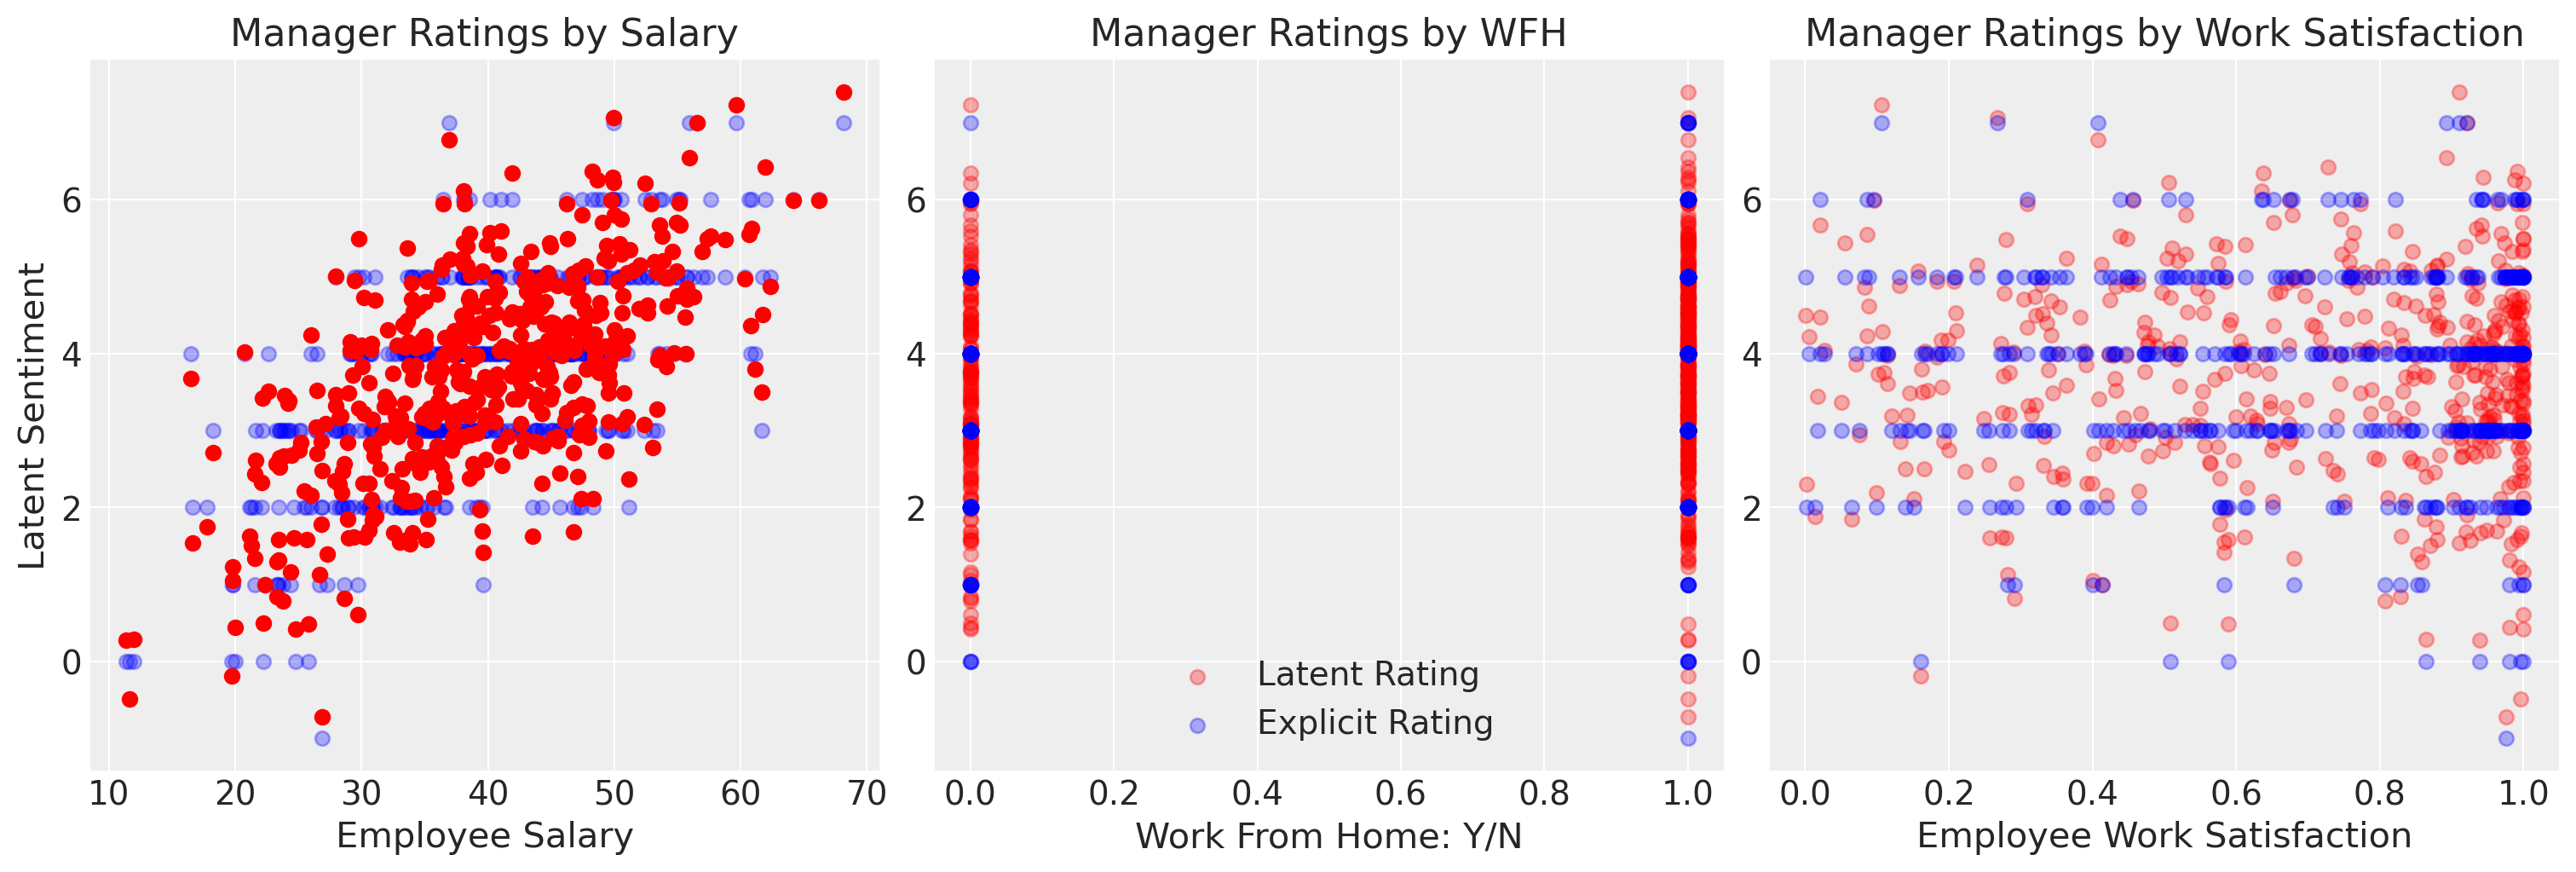

In [453]:
salary = np.random.normal(40,10, 500)
work_sat = np.random.beta(1, .4, 500)
work_from_home = bernoulli.rvs(.7, size=500)
latent_rating = 0.08423*salary + 0.2*work_sat + 0.4*work_from_home + np.random.normal(0,1, 500)
explicit_rating = np.round(latent_rating, 0)
K = len(np.unique(explicit_rating))


df = pd.DataFrame({'salary': salary, 'work_sat': work_sat, 'work_from_home': work_from_home,
                   'latent_rating': latent_rating, 'explicit_rating': explicit_rating})
df['rating'] = 'Rating' + df['explicit_rating'].astype(str)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()
ax = axs[0]
ax.scatter(df['salary'], df['explicit_rating'], label='Explicit Rating', color='blue', alpha=0.3)
axs[1].scatter(df['work_from_home'], df['latent_rating'], label='Latent Rating', color='red', alpha=0.3)
axs[1].scatter(df['work_from_home'], df['explicit_rating'], label='Explicit Rating', color='blue', alpha=0.3)
axs[2].scatter(df['work_sat'], df['latent_rating'], label='Latent Rating', color='red', alpha=0.3)
axs[2].scatter(df['work_sat'], df['explicit_rating'], label='Explicit Rating', color='blue', alpha=0.3)
ax.scatter(df['salary'], df['latent_rating'], label='Latent Sentiment', color='red')
ax.set_title("Manager Ratings by Salary")
axs[1].set_title("Manager Ratings by WFH")
axs[2].set_title("Manager Ratings by Work Satisfaction")
ax.set_ylabel("Latent Sentiment")
ax.set_xlabel("Employee Salary")
axs[1].set_xlabel("Work From Home: Y/N")
axs[2].set_xlabel("Employee Work Satisfaction")
axs[1].legend();



In [429]:
K = len(np.unique(explicit_rating))
    
def make_model(priors, model_spec = 1):
    with pm.Model() as model:
        
        sigma = pm.Exponential('sigma', priors['sigma'])
        cutpoints = pm.Normal("cutpoints", mu=priors['mu'], sigma=sigma,
                                  transform=pm.distributions.transforms.univariate_ordered)
        
        if model_spec == 1:
            beta = pm.Normal('beta', priors['beta'][0], priors['beta'][1], size=1)
            mu = pm.Deterministic('mu', beta[0]*salary)
        elif model_spec == 2:
            beta = pm.Normal('beta', priors['beta'][0], priors['beta'][1], size=2)
            mu = pm.Deterministic('mu', beta[0]*salary + beta[1]*work_sat)
        else: 
            beta = pm.Normal('beta', priors['beta'][0], priors['beta'][1], size=3)
            mu = pm.Deterministic('mu', beta[0]*salary + beta[1]*work_sat + beta[2]*work_from_home)
        y_ = pm.OrderedLogistic("y", cutpoints=cutpoints, eta=mu, observed=explicit_rating)
        idata = pm.sample(nuts_sampler='numpyro', idata_kwargs={"log_likelihood": True})
        idata.extend(pm.sample_posterior_predictive(idata))
    return idata, model

priors = {'sigma': 1, 'beta': [0, 1], 'mu': np.linspace(0, K, K-1)}
idata1, model1 = make_model(priors, model_spec=1)
idata2, model2 = make_model(priors, model_spec=2)
idata3, model3 = make_model(priors, model_spec=3)

/Users/nathanielforde/mambaforge/envs/pymc_examples_new/lib/python3.11/site-packages/pymc/sampling/mcmc.py:242: UserWarning: Use of external NUTS sampler is still experimental
  warnings.warn("Use of external NUTS sampler is still experimental", UserWarning)


Compiling...
Compilation time =  0:00:03.588709
Sampling...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Sampling time =  0:00:04.954816
Transforming variables...
Transformation time =  0:00:00.182545
Computing Log Likelihood...


Sampling: [y]


Log Likelihood time =  0:00:00.314696


/Users/nathanielforde/mambaforge/envs/pymc_examples_new/lib/python3.11/site-packages/pymc/sampling/mcmc.py:242: UserWarning: Use of external NUTS sampler is still experimental
  warnings.warn("Use of external NUTS sampler is still experimental", UserWarning)


Compiling...
Compilation time =  0:00:00.964164
Sampling...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Sampling time =  0:00:05.362186
Transforming variables...
Transformation time =  0:00:00.132280
Computing Log Likelihood...


Sampling: [y]


Log Likelihood time =  0:00:00.277297


/Users/nathanielforde/mambaforge/envs/pymc_examples_new/lib/python3.11/site-packages/pymc/sampling/mcmc.py:242: UserWarning: Use of external NUTS sampler is still experimental
  warnings.warn("Use of external NUTS sampler is still experimental", UserWarning)


Compiling...
Compilation time =  0:00:01.410945
Sampling...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Sampling time =  0:00:06.089244
Transforming variables...
Transformation time =  0:00:00.151314
Computing Log Likelihood...


Sampling: [y]


Log Likelihood time =  0:00:00.295214


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_full,0,-737.109366,10.763626,0.000000,7.707960e-01,16.770307,0.000000,False,log
model_salary,1,-740.328009,7.996592,3.218643,2.292040e-01,16.598310,3.469722,False,log
model_salary_worksat,2,-741.188900,9.321736,4.079534,3.330669e-16,16.552246,3.336607,False,log


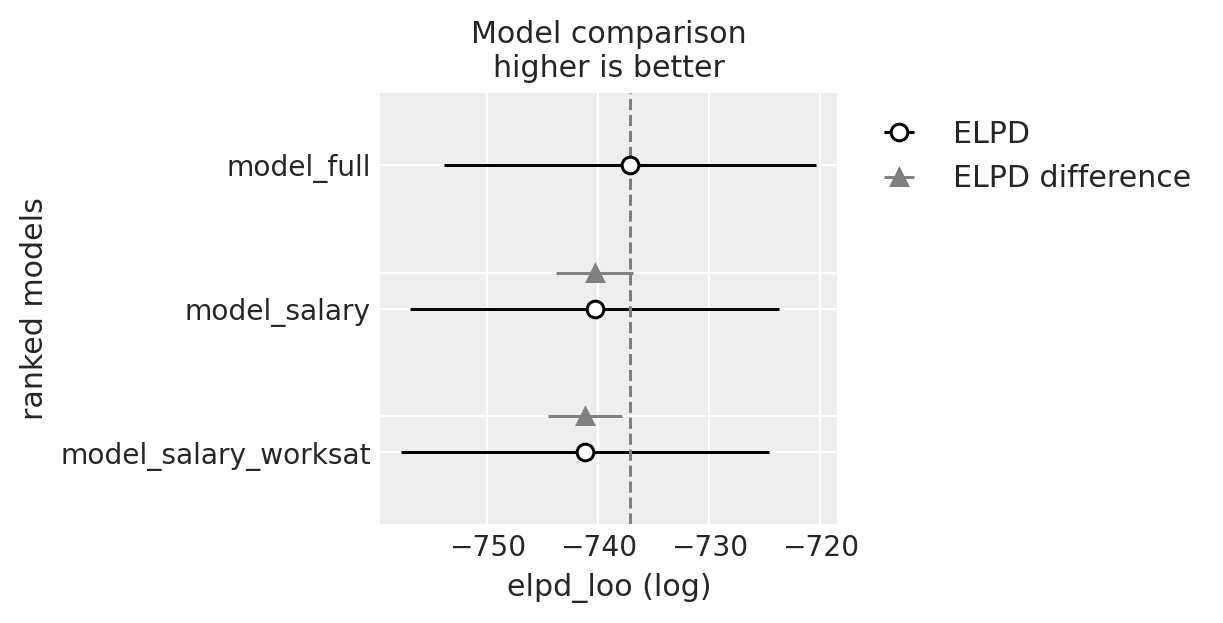

In [474]:
compare = az.compare({'model_salary': idata1, 'model_salary_worksat': idata2, 'model_full': idata3 })

az.plot_compare(compare)
compare

Text(0.5, 1.0, 'Model Parameter Estimates')

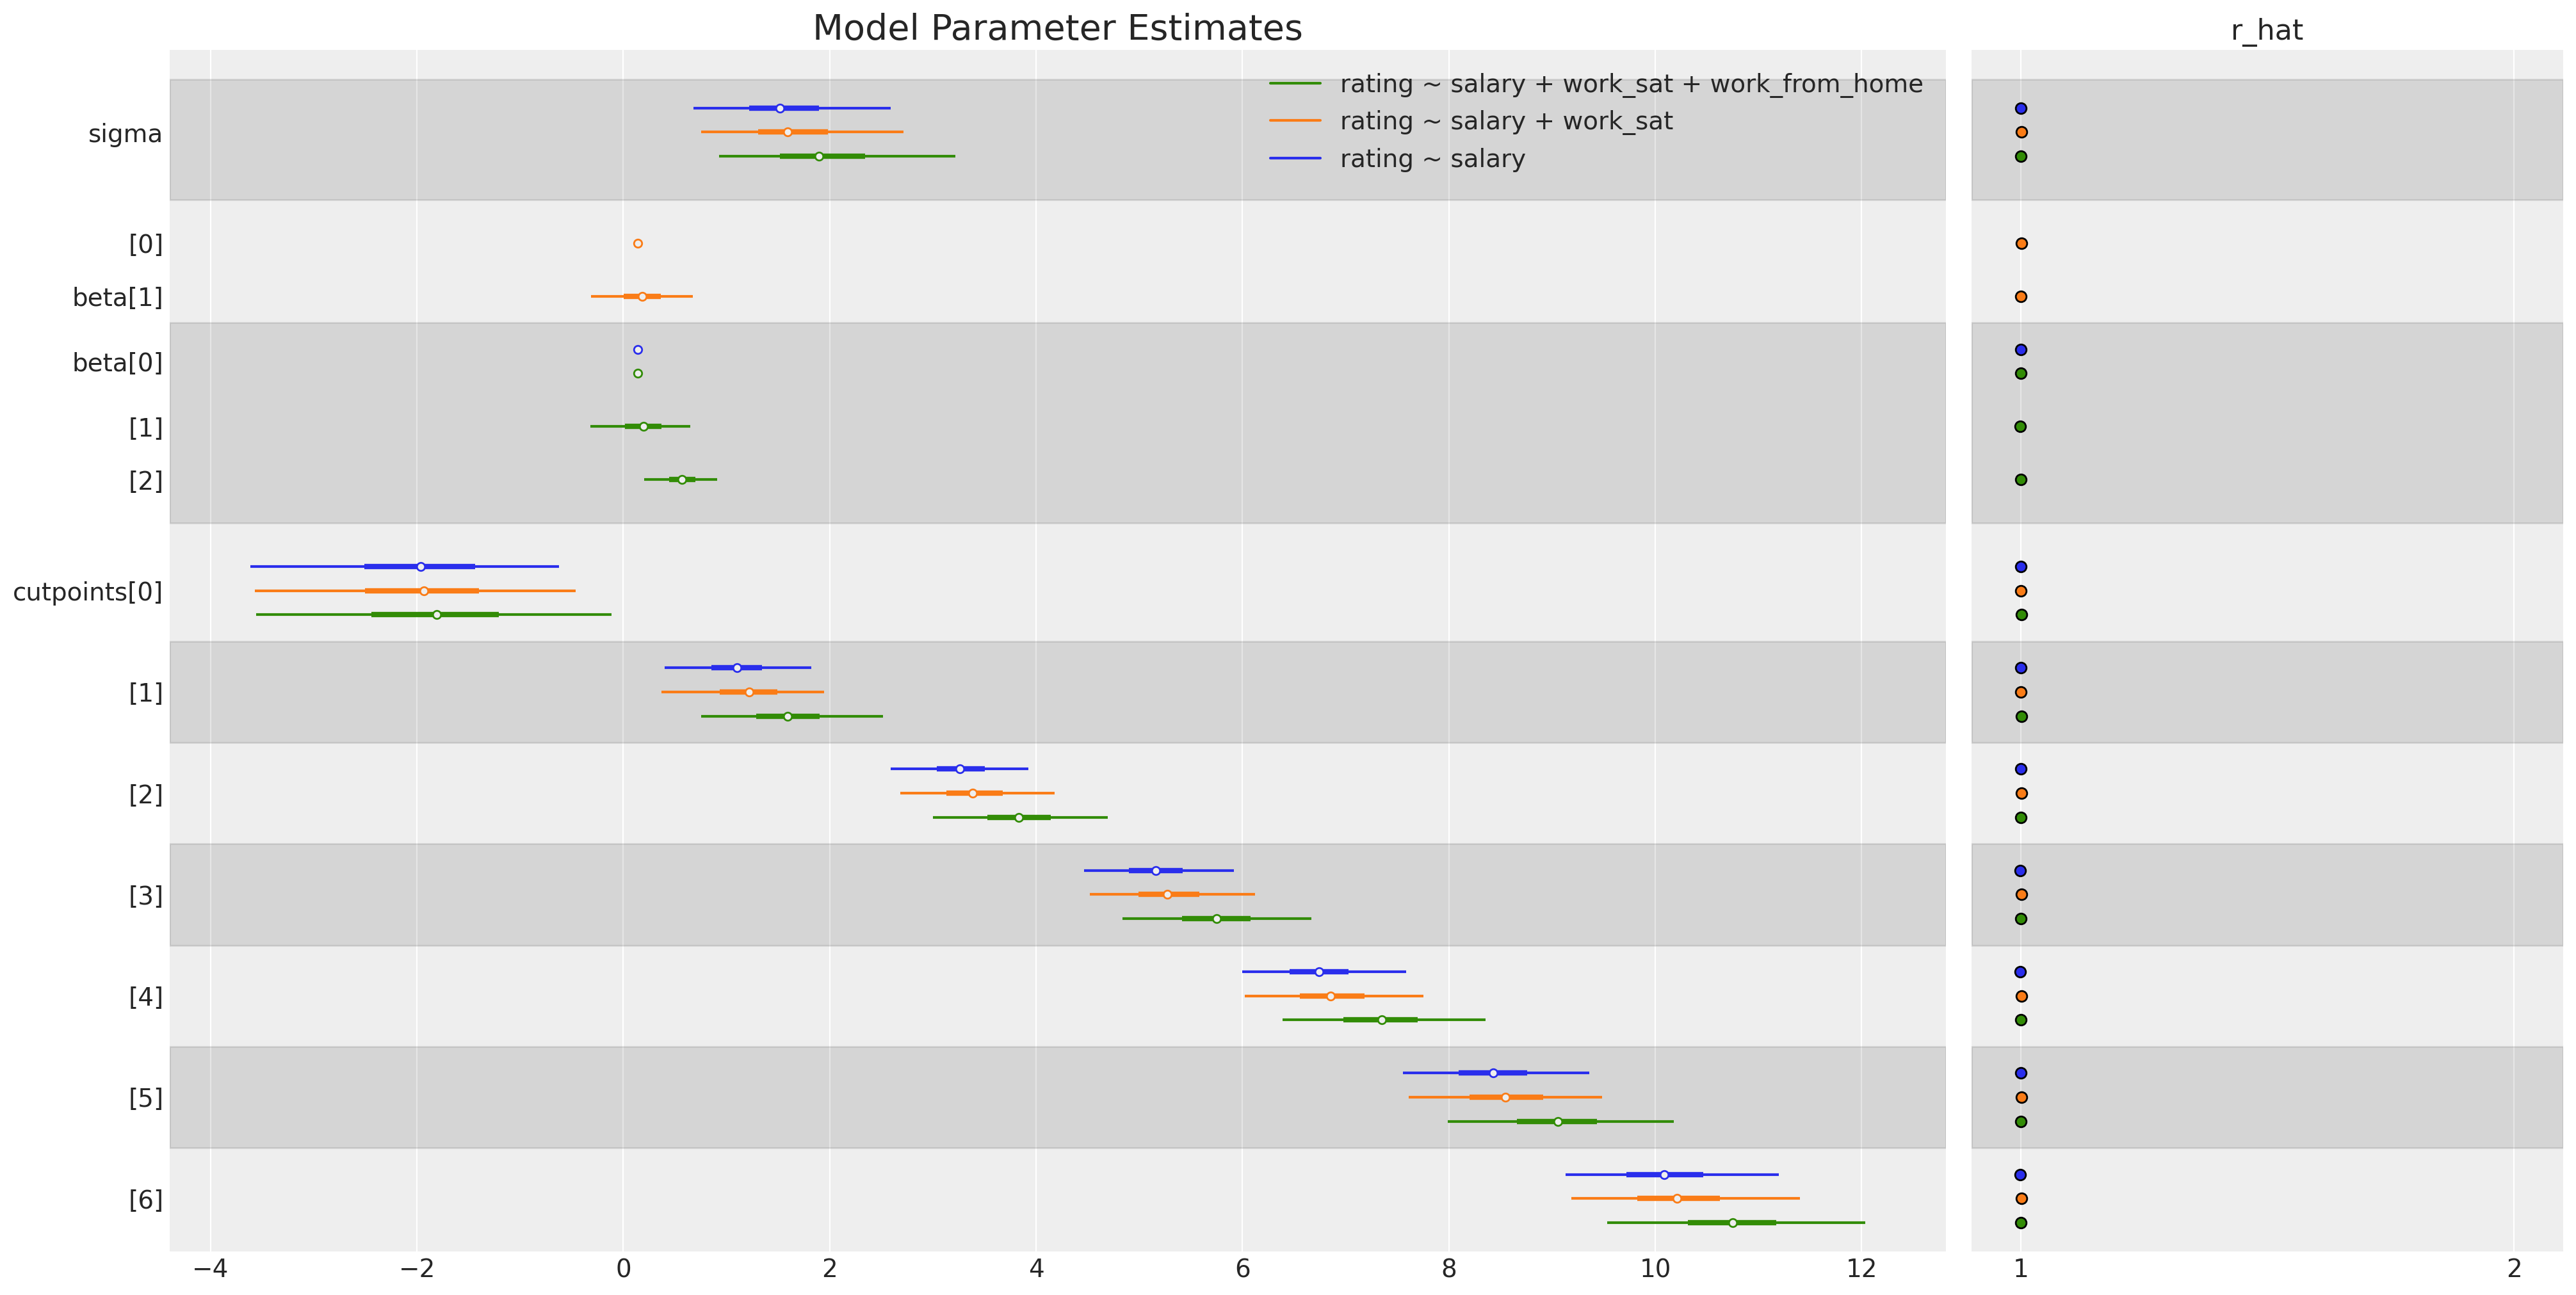

In [473]:
ax = az.plot_forest([idata1, idata2, idata3], var_names=['sigma', 'beta', 'cutpoints'], combined=True,
                           ridgeplot_overlap=4, figsize=(20, 10), r_hat=True, ridgeplot_alpha=0.3, 
                   model_names=['rating ~ salary', 'rating ~ salary + work_sat', 'rating ~ salary + work_sat + work_from_home'])
ax[0].set_title("Model Parameter Estimates", fontsize=20)

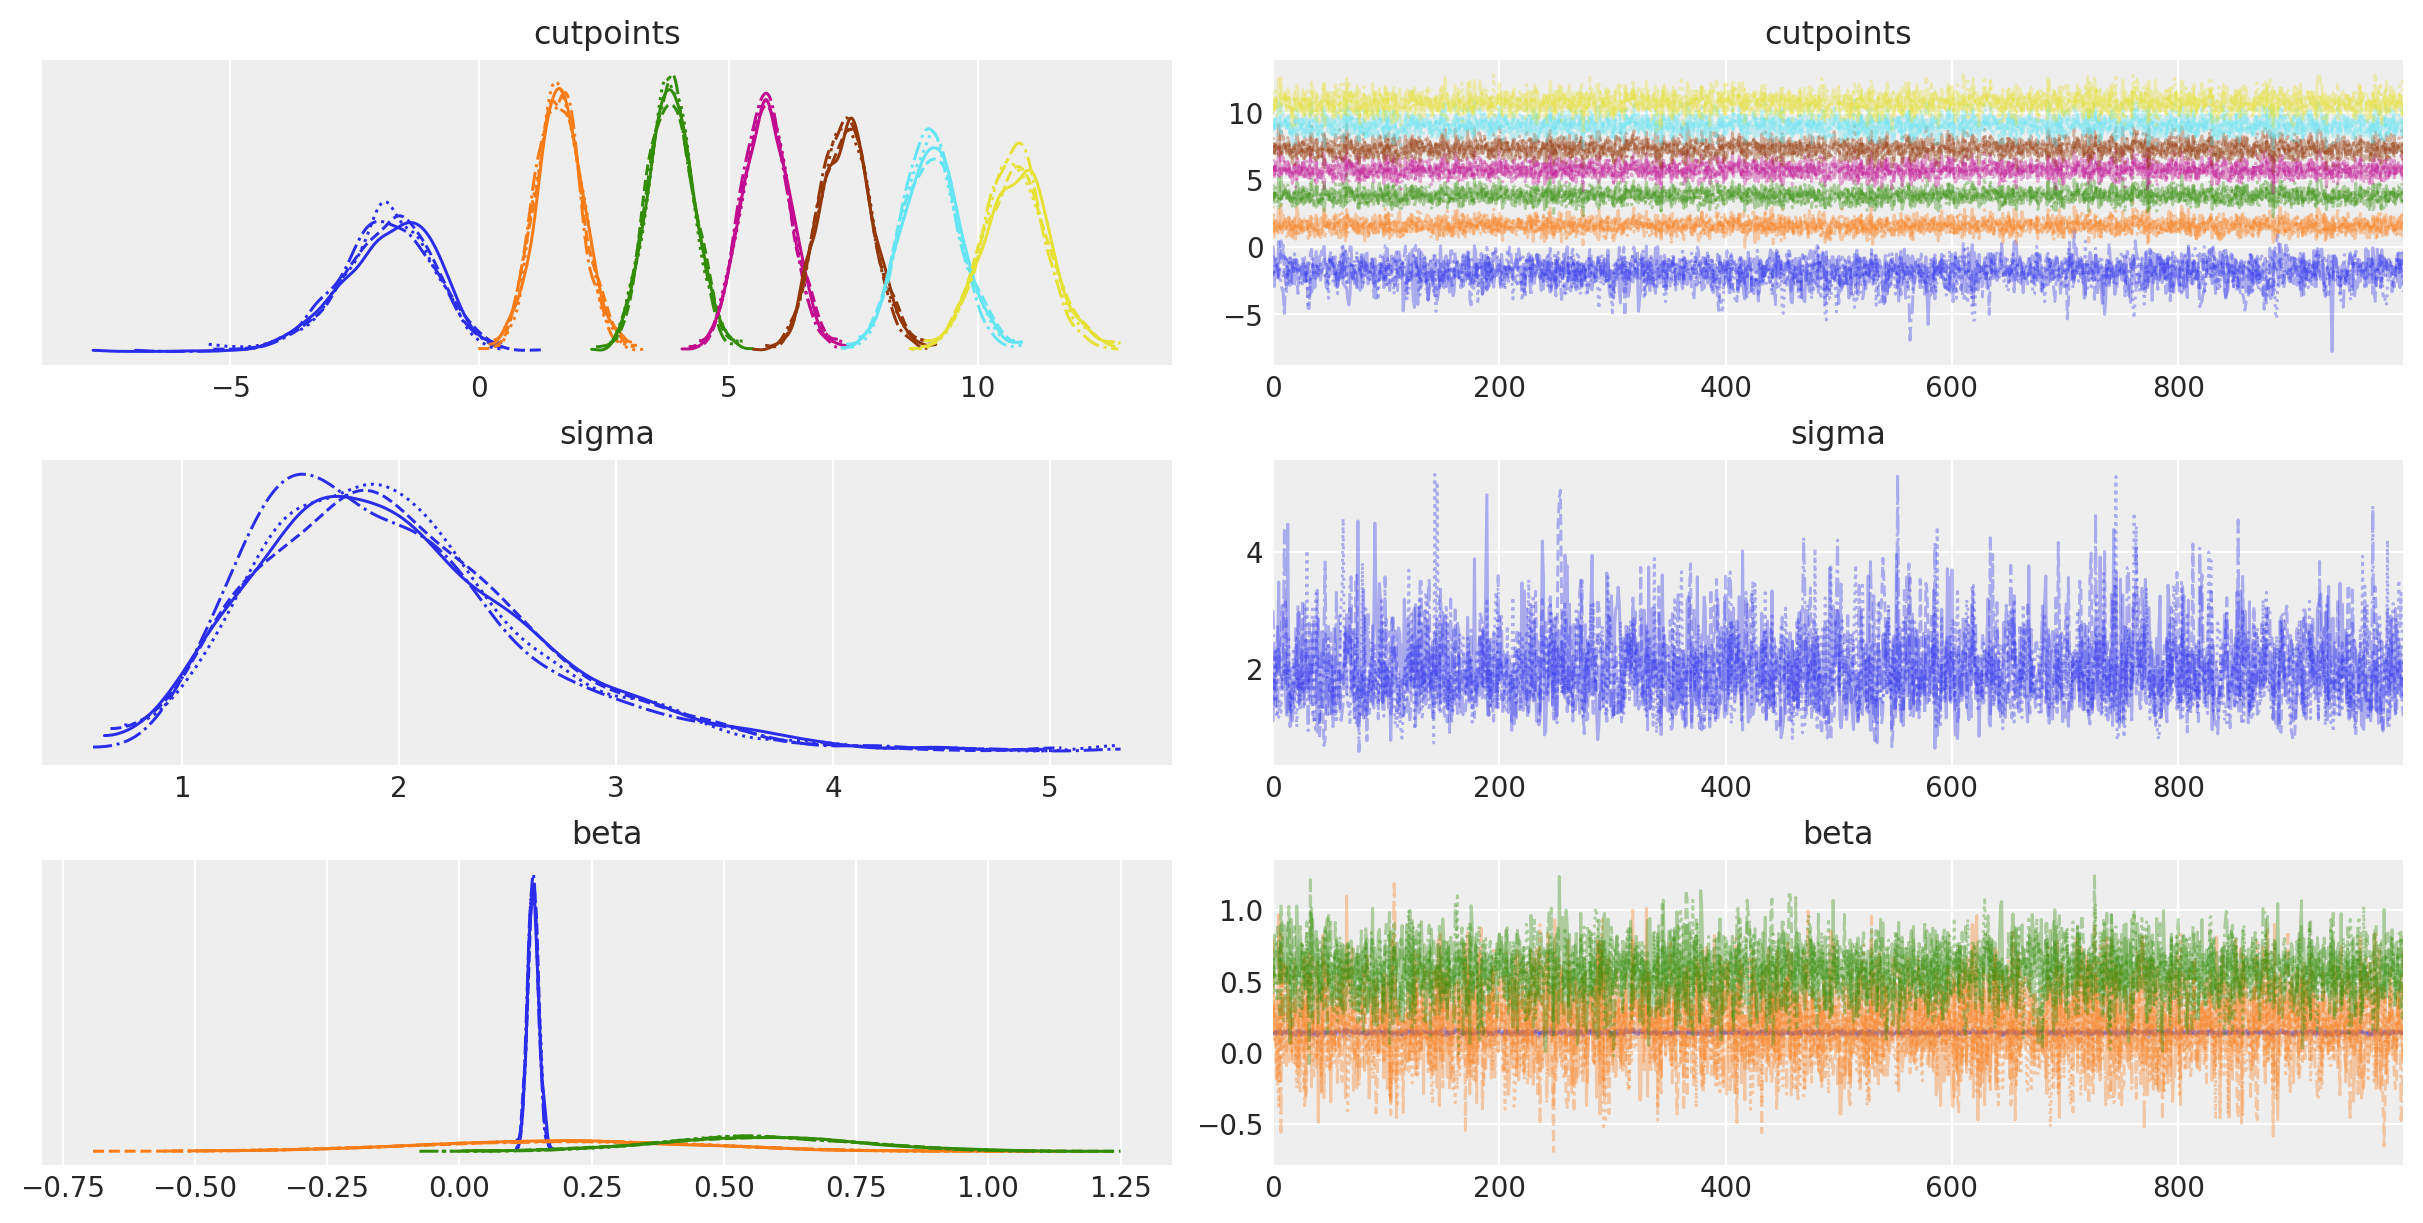

In [432]:
az.plot_trace(idata3, var_names=[ 'cutpoints', 'sigma', 'beta']);

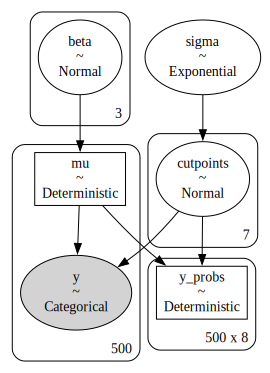

In [433]:
pm.model_to_graphviz(model3)

In [471]:
az.summary(idata3, var_names=[ 'cutpoints', 'beta', 'sigma'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
cutpoints[0],-1.870,0.941,-3.558,-0.113,0.022,0.016,1865.0,2218.0,1.0
cutpoints[1],1.600,0.465,0.756,2.514,0.008,0.006,3408.0,3131.0,1.0
cutpoints[2],3.839,0.454,2.999,4.696,0.009,0.006,2622.0,2925.0,1.0
cutpoints[3],5.753,0.491,4.835,6.670,0.010,0.007,2360.0,2876.0,1.0
cutpoints[4],7.352,0.531,6.392,8.358,0.011,0.008,2345.0,2897.0,1.0
cutpoints[5],9.065,0.582,7.991,10.179,0.012,0.009,2285.0,2756.0,1.0
cutpoints[6],10.756,0.651,9.533,12.034,0.014,0.010,2281.0,2020.0,1.0
beta[0],0.140,0.010,0.120,0.159,0.000,0.000,2591.0,2418.0,1.0
beta[1],0.191,0.261,-0.321,0.649,0.004,0.003,4320.0,3064.0,1.0
beta[2],0.568,0.187,0.204,0.907,0.003,0.002,4012.0,2687.0,1.0


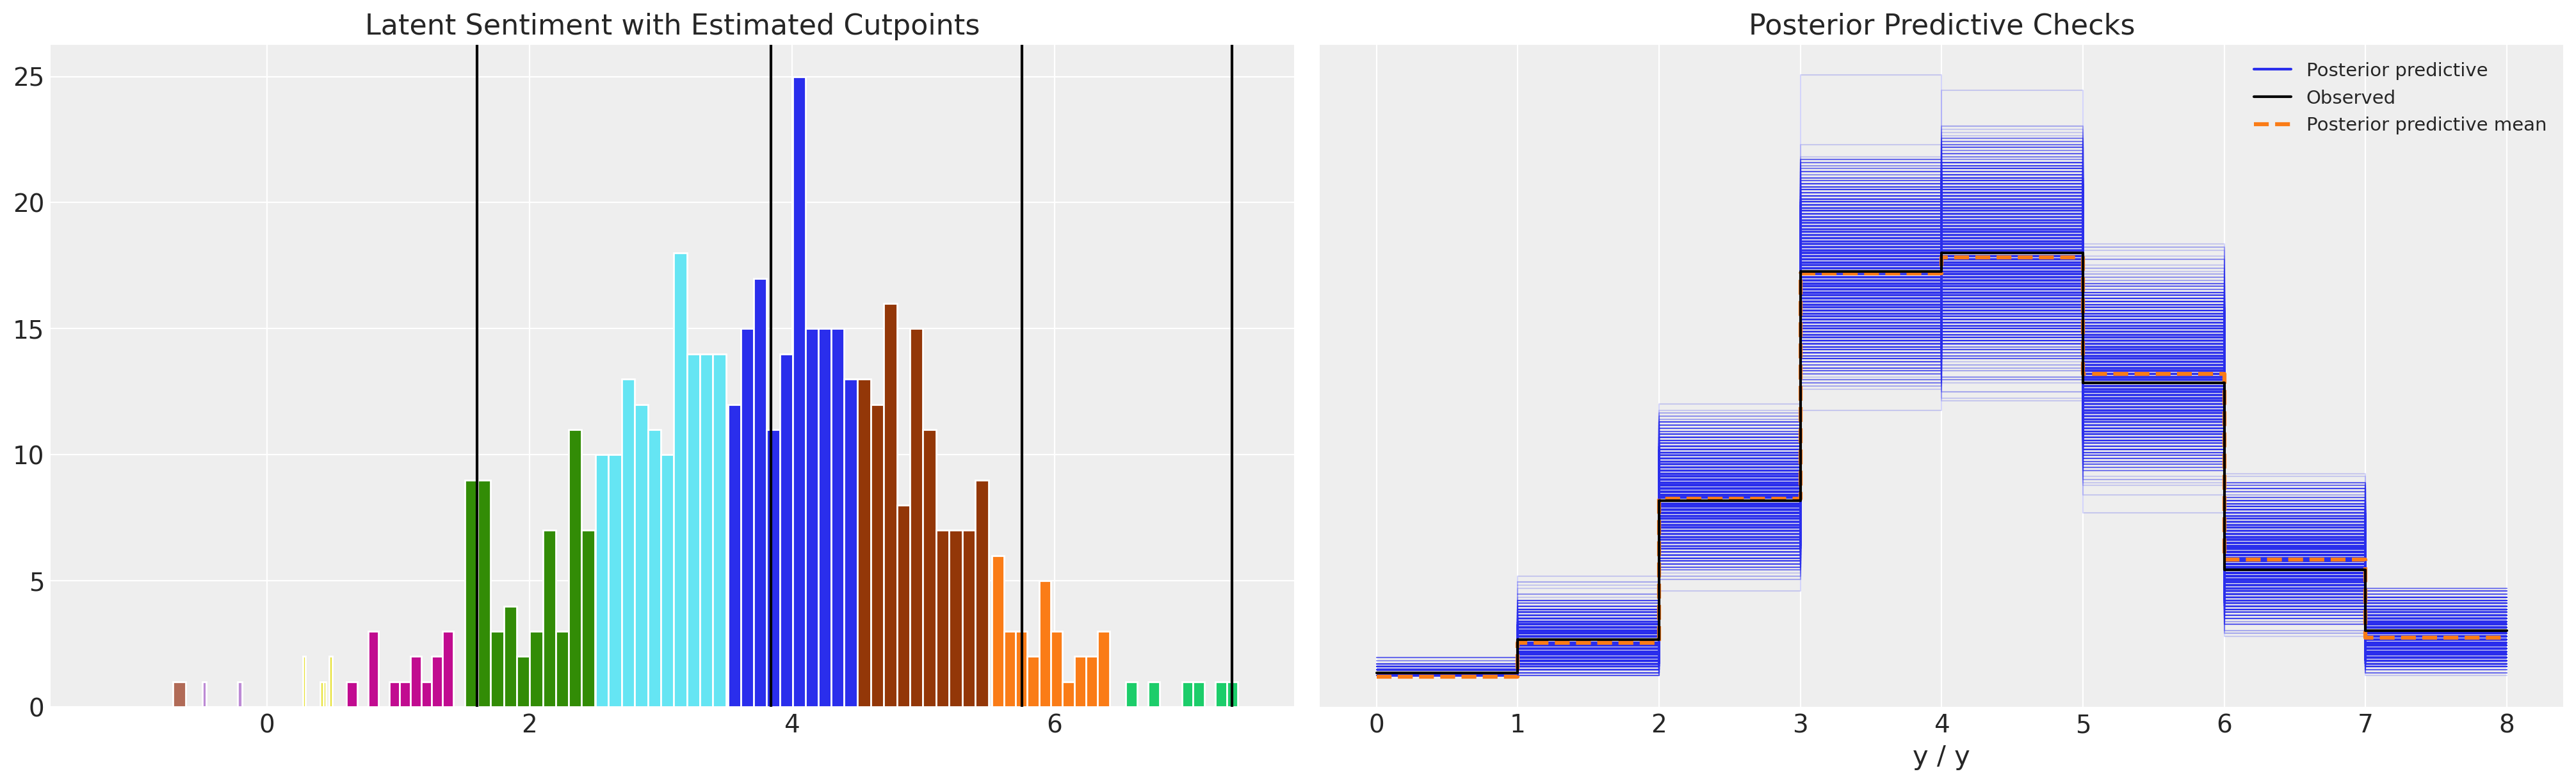

In [472]:
def plot_fit(idata):
    posterior = idata.posterior.stack(sample=("chain", "draw"))
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    axs = axs.flatten()
    ax = axs[0]
    ax.axvline(posterior["cutpoints"][1].mean().values, color='k');
    ax.axvline(posterior["cutpoints"][2].mean().values, color='k');
    ax.axvline(posterior["cutpoints"][3].mean().values, color='k');
    ax.axvline(posterior["cutpoints"][4].mean().values, color='k');
    #ax.hist(posterior["cutpoints"][5], 80, alpha=0.2, color='k');
    for r in df['rating'].unique():
        temp = df[df['rating'] == r]
        ax.hist(temp['latent_rating'], ec='white')
    ax.set_title("Latent Sentiment with Estimated Cutpoints")
    axs[1].set_title("Posterior Predictive Checks")
    az.plot_ppc(idata, ax=axs[1])
    plt.show();

plot_fit(idata3)

In [300]:
happiness_df = pd.read_csv('../data/happiness_ratings_by_race_agresti.csv', index_col='Unnamed: 0')
happiness_df.groupby(['race', 'trauma'])['happy'].count()


race  trauma
0     0         23
      1         21
      2         22
      3         11
      4          5
      5          2
1     0          2
      1          4
      2          4
      3          3
Name: happy, dtype: int64

## Authors
- Authored by [Nathaniel Forde](https://github.com/NathanielF) in April 2023 

## References
:::{bibliography}
:filter: docname in docnames
:::

## Watermark

In [9]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor

Last updated: Fri Mar 17 2023

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.11.0

pytensor: 2.10.1

numpy     : 1.24.2
arviz     : 0.15.1
matplotlib: 3.7.1
pandas    : 1.5.3
pymc      : 5.1.1
pytensor  : 2.10.1

Watermark: 2.3.1



:::{include} ../page_footer.md
:::